## Report 4: Candidate moves

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/4

#### PROBLEM DESCRIPTION:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to compare the paths created by the steepest method taken from the previous assignment (baseline) and candidate move heuristic.

In [1]:
from scripts import *

np.random.seed(123)

a = "../data/TSPA.csv"
b = "../data/TSPB.csv"
c = "../data/TSPC.csv"
d = "../data/TSPD.csv"

Results: avg(min - max)
77851.333(75645.0 - 80094.0)
Best solution: [0, 1, 4, 6, 8, 11, 12, 14, 19, 20, 21, 22, 24, 26, 27, 31, 36, 37, 41, 43, 45, 48, 50, 51, 53, 55, 59, 60, 62, 64, 66, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 92, 94, 95, 96, 98, 101, 106, 108, 109, 111, 112, 113, 114, 116, 117, 119, 121, 123, 124, 127, 128, 130, 132, 134, 135, 141, 143, 144, 147, 149, 152, 153, 154, 156, 159, 160, 161, 163, 164, 167, 169, 170, 172, 174, 175, 177, 178, 185, 186, 189, 190, 192, 194, 195, 199]


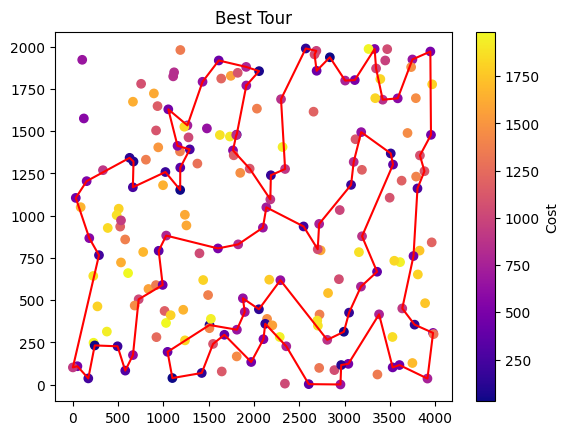

In [2]:
run_baseline(a, 3)

In [2]:
run_experiment(a, 3)

: 